In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [3]:
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
numeric_features = train.select_dtypes(include=[np.number])
print(numeric_features.dtypes)

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object


In [6]:
corr = numeric_features.corr()

In [7]:
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [8]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

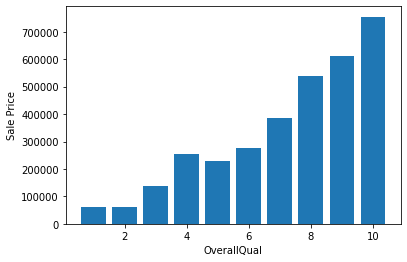

In [9]:
plt.bar(train['OverallQual'],train['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('OverallQual')
plt.show()

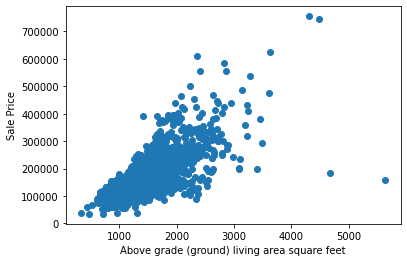

In [10]:
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

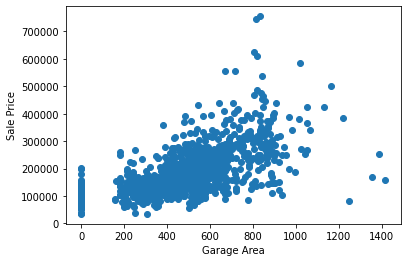

In [11]:
#outliers removed
plt.scatter(x=train['GarageArea'], y=train['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

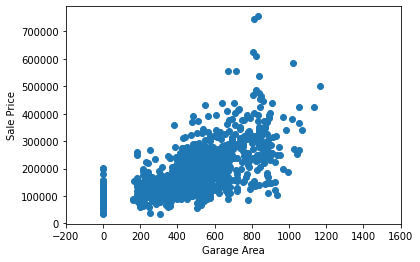

In [12]:
train = train[train['GarageArea'] < 1200]
plt.scatter(x=train['GarageArea'], y=train['SalePrice'])
plt.xlim(-200,1600) 
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [13]:
#   Handling Null Values    
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls) 

              Null Count
Feature                 
PoolQC              1449
MiscFeature         1402
Alley               1364
Fence               1174
FireplaceQu          689
LotFrontage          258
GarageCond            81
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
BsmtExposure          38
BsmtFinType2          38
BsmtFinType1          37
BsmtCond              37
BsmtQual              37
MasVnrArea             8
MasVnrType             8
Electrical             1
Utilities              0
YearRemodAdd           0
MSSubClass             0
Foundation             0
ExterCond              0
ExterQual              0


In [14]:
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())
test['LotFrontage']=test['LotFrontage'].fillna(test['LotFrontage'].mean())

In [15]:
train.drop(['Alley'],axis=1,inplace=True)
test.drop(['Alley'],axis=1,inplace=True)

In [16]:
train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['BsmtQual']=train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
test['BsmtCond']=test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
test['BsmtQual']=test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])

In [17]:
train['FireplaceQu']=train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])
train['GarageType']=train['GarageType'].fillna(train['GarageType'].mode()[0])
test['FireplaceQu']=test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])
test['GarageType']=test['GarageType'].fillna(test['GarageType'].mode()[0])

In [18]:
train.drop(['GarageYrBlt'],axis=1,inplace=True)
test.drop(['GarageYrBlt'],axis=1,inplace=True)

In [19]:
train['GarageFinish']=train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageQual']=train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['GarageCond']=train['GarageCond'].fillna(train['GarageCond'].mode()[0])
test['GarageFinish']=test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
test['GarageQual']=test['GarageQual'].fillna(test['GarageQual'].mode()[0])
test['GarageCond']=test['GarageCond'].fillna(test['GarageCond'].mode()[0])

In [20]:
train.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
test.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [21]:
submission = pd.DataFrame()
# The first column must the contain the ID from the test data.
train.drop(['Id'],axis=1,inplace=True)

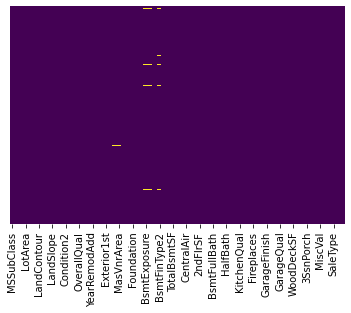

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
train['MasVnrType']=train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mode()[0])
test['MasVnrType']=test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test['MasVnrArea']=test['MasVnrArea'].fillna(test['MasVnrArea'].mode()[0])

In [24]:
train['BsmtExposure']=train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
test['BsmtExposure']=test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])

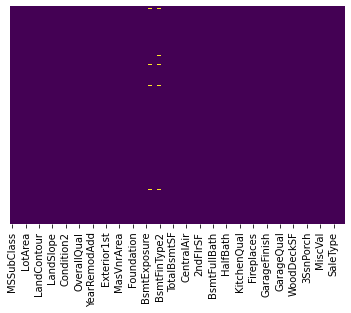

In [25]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [26]:
# train.dropna(inplace=True)
# test.dropna(inplace=True)
# test.dropna(inplace=True,axis=0)

In [27]:
print(sum(train.isnull().sum() != 0))

3


In [28]:
print(sum(test.isnull().sum() != 0))

17


In [29]:
#   Handling Null Values    
nulls = pd.DataFrame(test.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls) 

              Null Count
Feature                 
BsmtFinType1          42
BsmtFinType2          42
MSZoning               4
Utilities              2
BsmtFullBath           2
BsmtHalfBath           2
Functional             2
GarageCars             1
BsmtFinSF1             1
BsmtFinSF2             1
BsmtUnfSF              1
SaleType               1
Exterior2nd            1
Exterior1st            1
KitchenQual            1
TotalBsmtSF            1
GarageArea             1
Condition2             0
LandContour            0
MSSubClass             0
LotFrontage            0
LotArea                0
Street                 0
LotShape               0
BsmtQual               0


In [30]:
print(train.shape)
print(test.shape)

(1455, 75)
(1459, 75)


In [31]:
# handling test dataset
# test.isnull().sum()

In [32]:
# test['LotFrontage']=test['LotFrontage'].fillna(test['LotFrontage'].mean())

In [33]:
# test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].mode()[0])

In [34]:
# test.drop(['Alley'],axis=1,inplace=True)

In [35]:
# test['BsmtCond']=test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
# test['BsmtQual']=test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])

In [36]:
# test.drop(['GarageYrBlt'],axis=1,inplace=True)

In [37]:
# test['GarageFinish']=test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
# test['GarageQual']=test['GarageQual'].fillna(test['GarageQual'].mode()[0])
# test['GarageCond']=test['GarageCond'].fillna(test['GarageCond'].mode()[0])

# test.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [38]:
# sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [39]:
# test['BsmtExposure']=test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])

In [40]:
# test['Utilities']=test['Utilities'].fillna(test['Utilities'].mode()[0])
# test['Exterior1st']=test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
# test['Exterior2nd']=test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
# test['BsmtFinType1']=test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])
# test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
# test['BsmtFinSF2']=test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean())
# test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())
# test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
# test['BsmtFullBath']=test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0])
# test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0])
# test['KitchenQual']=test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
# test['Functional']=test['Functional'].fillna(test['Functional'].mode()[0])
# test['GarageCars']=test['GarageCars'].fillna(test['GarageCars'].mean())
# test['GarageArea']=test['GarageArea'].fillna(test['GarageArea'].mean())
# test['SaleType']=test['SaleType'].fillna(test['SaleType'].mode()[0])

In [41]:
# test['FireplaceQu']=test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])
# test['GarageType']=test['GarageType'].fillna(test['GarageType'].mode()[0])

In [42]:
# test.dropna(inplace=True)

In [43]:
# Categorical encoding
categoricals_train = train.select_dtypes(exclude=[np.number])
print(categoricals_train.describe())

       MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1455   1455     1455        1455      1455      1455      1455   
unique        5      2        4           4         2         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq       1147   1450      921        1309      1454      1048      1378   

       Neighborhood Condition1 Condition2  ... KitchenQual Functional  \
count          1455       1455       1455  ...        1455       1455   
unique           25          9          8  ...           4          7   
top           NAmes       Norm       Norm  ...          TA        Typ   
freq            225       1257       1441  ...         733       1355   

       FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
count         1455       1455         1455       1455       1455       1455   
unique           5          6            3          5          5          3   
top        

In [44]:
categoricals_train.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [45]:
categoricals_test = test.select_dtypes(exclude=[np.number])
print(categoricals_test.describe())

       MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1455   1459     1459        1459      1457      1459      1459   
unique        5      2        4           4         1         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq       1114   1453      934        1311      1457      1081      1396   

       Neighborhood Condition1 Condition2  ... KitchenQual Functional  \
count          1459       1459       1459  ...        1458       1457   
unique           25          9          5  ...           4          7   
top           NAmes       Norm       Norm  ...          TA        Typ   
freq            218       1251       1444  ...         757       1357   

       FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
count         1459       1459         1459       1459       1459       1459   
unique           5          6            3          4          5          3   
top        

In [46]:
categoricals_test.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [47]:
# train_encode = pd.get_dummies(train[categoricals_train.columns])
# test_encode = pd.get_dummies(test[categoricals_test.columns])

In [48]:
# print(train_encode.shape)
# print(test_encode.shape)

In [49]:
train1 = pd.get_dummies(train[categoricals_train.columns],prefix_sep='__')
test1 = pd.get_dummies(test[categoricals_test.columns],prefix_sep='__')
train_enc, test_enc = train1.align(test1, join='inner', axis=1)

In [50]:
train = train.drop(categoricals_train.columns,axis=1)
test = test.drop(categoricals_test.columns,axis=1)

In [51]:
train = pd.concat([train_enc,train],axis=1)
test = pd.concat([test_enc,test],axis=1)

In [52]:
train.shape

(1455, 259)

In [53]:
test.shape

(1459, 259)

In [54]:
train.head()

,MSZoning__C (all),MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,Street__Grvl,Street__Pave,LotShape__IR1,LotShape__IR2,LotShape__IR3,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,1,0,0,1,0,0,0,...,0,61,0,0,0,0,0,2,2008,208500
1,0,0,0,1,0,0,1,0,0,0,...,298,0,0,0,0,0,0,5,2007,181500
2,0,0,0,1,0,0,1,1,0,0,...,0,42,0,0,0,0,0,9,2008,223500
3,0,0,0,1,0,0,1,1,0,0,...,0,35,272,0,0,0,0,2,2006,140000
4,0,0,0,1,0,0,1,1,0,0,...,192,84,0,0,0,0,0,12,2008,250000


In [55]:
train.isnull().sum().sum()

0

In [56]:
# test['SalePrice'] = ''

In [57]:
# final_df = pd.concat([train,test])

In [58]:
# final_df

In [59]:
# test = final_df.iloc[1417:,:]

In [60]:
test.head()

,MSZoning__C (all),MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,Street__Grvl,Street__Pave,LotShape__IR1,LotShape__IR2,LotShape__IR3,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,0,1,0,0,0,1,0,0,0,...,730.0,140,0,0,0,120,0,0,6,2010
1,0,0,0,1,0,0,1,1,0,0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,0,0,0,1,0,0,1,1,0,0,...,482.0,212,34,0,0,0,0,0,3,2010
3,0,0,0,1,0,0,1,1,0,0,...,470.0,360,36,0,0,0,0,0,6,2010
4,0,0,0,1,0,0,1,1,0,0,...,506.0,0,82,0,0,144,0,0,1,2010


In [61]:
# test.drop('SalePrice',inplace=True,axis=1)

In [62]:
submission['Id'] = test.Id
test.drop(['Id'],axis=1,inplace=True)

In [63]:
y = train.pop('SalePrice')
X = train

In [64]:
X.head()

,MSZoning__C (all),MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,Street__Grvl,Street__Pave,LotShape__IR1,LotShape__IR2,LotShape__IR3,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,0,0,1,0,0,1,0,0,0,...,548,0,61,0,0,0,0,0,2,2008
1,0,0,0,1,0,0,1,0,0,0,...,460,298,0,0,0,0,0,0,5,2007
2,0,0,0,1,0,0,1,1,0,0,...,608,0,42,0,0,0,0,0,9,2008
3,0,0,0,1,0,0,1,1,0,0,...,642,0,35,272,0,0,0,0,2,2006
4,0,0,0,1,0,0,1,1,0,0,...,836,192,84,0,0,0,0,0,12,2008


In [65]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(X)
# transform the dataset
X = imputer.transform(X)

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1) 

In [67]:
from sklearn.ensemble import RandomForestRegressor
lr = RandomForestRegressor(random_state=23)
lr.fit(X_train,y_train)

RandomForestRegressor(random_state=23)

In [68]:
y_pred = lr.predict(X_test)

In [69]:
y_pred

array([153116.7 , 391372.39, 122621.24, 197806.  , 157034.81, 356117.39,
       124618.11, 130824.95, 149423.5 , 231062.85, 148802.82,  63904.55,
       126620.71, 186055.48, 189174.64, 323635.02, 175060.24, 111230.58,
       193218.44, 167194.45, 145653.5 , 142242.03, 374305.57, 222394.73,
       135194.4 ,  98478.68, 115964.43, 345023.44, 160506.  , 135690.  ,
       168538.14, 159912.43, 119452.03, 278315.81, 136344.5 , 160163.5 ,
       169446.4 , 111978.29, 173965.93, 152451.5 , 150937.26, 141658.55,
       108059.5 , 237309.2 , 269212.98, 122796.66, 112810.09, 166731.45,
       134071.02, 191203.5 , 105939.12, 127608.84, 119766.66, 217195.08,
       143864.5 ,  91428.82, 117887.75, 229663.34, 105426.  , 229513.88,
       158460.5 , 197624.04, 171145.7 , 147209.84, 156351.25, 147871.18,
        90164.9 , 123562.58, 194736.57, 174362.64, 107699.54, 179813.49,
       169330.71, 163135.5 , 193758.14, 334807.32,  91803.47, 107874.43,
       121832.04, 132004.37, 223583.55, 119370.18, 

In [70]:
lr.score(X_test,y_test)

0.9052590055902494

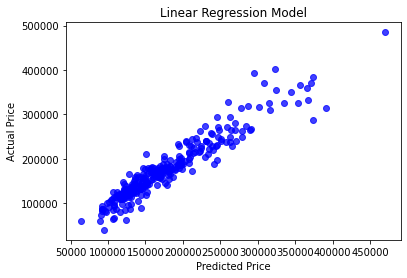

In [71]:
actual_values = y_test
plt.scatter(y_pred, actual_values, alpha=.75,
            color='b')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [72]:
test.isnull().sum().sum()

10

In [73]:
# test.dropna(inplace=True,axis=0)
# from sklearn.impute import KNNImputer
# imputer = KNNImputer()
# fit on the dataset
imputer.fit(test)
# transform the dataset
test = imputer.transform(test)

In [74]:
predictions = lr.predict(test)

In [75]:
predictions

array([127750.66, 153579.32, 183813.8 , ..., 151820.33, 117176.87,
       226097.66])

In [76]:
lr.score(test,predictions)

1.0

In [77]:
submission.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [78]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [80]:
clf = LazyRegressor(verbose=0)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 42/42 [00:59<00:00,  1.41s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
PoissonRegressor,0.36,0.93,18566.70,0.13
HuberRegressor,0.30,0.92,19444.84,0.88
PassiveAggressiveRegressor,0.28,0.92,19641.27,0.56
LassoCV,0.25,0.92,20062.86,0.71
LassoLarsCV,0.25,0.92,20087.78,0.90
ExtraTreesRegressor,0.21,0.91,20662.68,3.00
ElasticNet,0.21,0.91,20699.01,0.08
GradientBoostingRegressor,0.20,0.91,20718.45,2.12
GammaRegressor,0.18,0.91,20963.94,0.05


In [81]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=500, random_state=43).fit(X_train, y_train)
reg.score(X_test, y_test)

0.9164496475379659

In [82]:
pred = reg.predict(test)

In [83]:
pred

array([120199.626, 148670.286, 173835.676, ..., 142837.778, 112578.   ,
       210329.354])

In [84]:
# from sklearn.ensemble import GradientBoostingRegressor
# reg = GradientBoostingRegressor(random_state=42,max_depth=10)
# reg.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=10, random_state=42)

In [85]:
# reg.score(X_test, y_test)

0.8840851811730236

In [86]:
submission['SalePrice'] = pred
submission.head()

,Id,SalePrice
0,1461,120199.63
1,1462,148670.29
2,1463,173835.68
3,1464,189130.53
4,1465,192417.89


In [87]:
submission.shape

(1459, 2)

In [88]:
len(predictions)

42

In [89]:
submission.to_csv('submission3.csv', index=False)